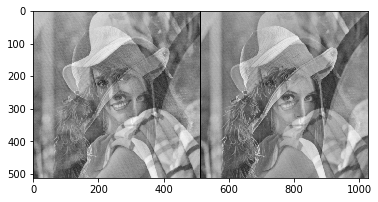

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
img1 = imread('image1.png')
img2 = imread('image2.png')
h1,w1 = np.shape(img1)
zero = np.zeros((h1,3))
img = np.hstack((img1,zero,img2))
plt.imshow(img,cmap = 'gray')

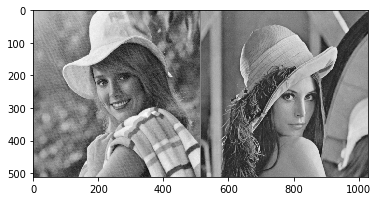

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.00001 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
img1 = imread('image1.png')
img2 = imread('image2.png')
h1,w1 = np.shape(img1)
h2,w2 = np.shape(img2)
img1 = img1.flatten()
img2 = img2.flatten()
data = [img1,img2]

#独立成分分析
data_ica = ICA(data).main()

#画像を表示
img1_ica = data_ica[0].reshape(h1,w1)
img2_ica = data_ica[1].reshape(h2,w2)
plt.imsave('img1_ica.png',img1_ica,cmap='gray')
plt.imsave('img2_ica.png',img2_ica,cmap='gray')
zero = np.zeros((h1,5))
img_ica = np.hstack((img1_ica,zero,img2_ica))
plt.imshow(img_ica,cmap = 'gray')